Notebook to segment a mouse and average the segmentation over 100 frames in which the mouse is moving as little as possible 

In [13]:
import numpy as np
import os 
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import filters
from skimage.filters import meijering, sato, frangi, hessian
import skimage.segmentation as seg
from scipy import ndimage as ndi
import cv2
import skimage as sk
from skimage.feature import canny
from scipy.ndimage import gaussian_filter as gaussian_filter
import copy
from skimage.transform import resize
from skimage.morphology import watershed



In [14]:
path = "./data/awake mouse 300fps_frames/"
outpath = "./data/awake mouse binary/"
outpathfragi = "./data/awake mouse vessel/"

In [15]:
def binarize(data, threshold): 
    data[data > threshold] = 2
    data[data <= threshold] = 1
    return data

In [16]:
def normalize(data): 
    mindata = np.min(data)
    maxdata = np.max(data)
    return (data-mindata)/(maxdata-mindata)

In [17]:
files = os.listdir(path)
print("Found: ", len(files), "files in directory")
files.sort()
files = files[0::1000]
print("Picked: ", len(files), "files")


Found:  60001 files in directory
Picked:  61 files


Importing:  00000999.tiff
File has shape (512, 640)  and mean 78.53002014160157


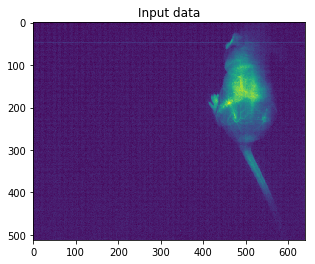

KeyboardInterrupt: 

In [18]:
data3D = []
for file in files: 
    if file.endswith(".tiff"):
        print("Importing: ", file)
        data = imread(path + file)
        data3D.append(data)
        print("File has shape", np.shape(data)," and mean", np.mean(data))
        plt.imshow(data)
        plt.title("Input data")
        plt.show()
        if np.mean(data) > 77:
            markers = binarize(normalize(data), 0.15)
            segmentation = watershed(data, markers)
            gaussian = gaussian_filter(segmentation,1)
            markers = binarize(normalize(gaussian), 0.15)
            segmentation = watershed(gaussian, markers)
            outname = outpath + file.split(".tiff")[0]+"_binary.tiff"
            imsave(outname, ((segmentation*127.5).astype('uint8')))
            indata = resize(data, (2048,2560))
            meij = meijering(indata,sigmas=(0.5,8), black_ridges=False)
            plt.imshow(meij)
            plt.title("Vessel Segmentation")
            plt.show()
            binarysegmentation = copy.deepcopy(meij)
            binarysegmentation = normalize(binarysegmentation)
            binarysegmentation = (binarize(binarysegmentation, 0.07))
            outnamefragi = outpathfragi + file.split(".tiff")[0]+"_vessel.tiff"
            outbinarysegmentation = resize(binarysegmentation, (512,640))
            imsave(outnamefragi, ((normalize(binarysegmentation))*127.5).astype('uint8'))
            plt.imshow(binarysegmentation)
            plt.title("Binary Segmentation")
            plt.show()